In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import osmnx as ox

In [2]:
# Load Hungary's boundary
hungary = ox.geocode_to_gdf('Hungary')

# Hydrography feature file names
feature_files = {
    "river": "hungary_river.geojson",
    "canal": "hungary_canal.geojson",
    "water": "hungary_water.geojson",
    "stream": "hungary_stream.geojson",
    "drain": "hungary_drain.geojson"
}

# Load hydrography features
water_features = {key: gpd.read_file(file) for key, file in feature_files.items()}

In [23]:
# Visualization styles
feature_styles = {
    "river": {"color": "deepskyblue", "alpha": 1, "linewidth": 1.7, "zorder": 2},
    "canal": {"color": "cornflowerblue", "alpha": 0.9, "linewidth": 0.7, "zorder": 1},
    "water": {"color": "cornflowerblue", "alpha": 0.9, "linewidth": 0.6, "zorder": 1},
    "stream": {"color": "royalblue", "alpha": 0.8, "linewidth": 0.5, "zorder": 1},
    "drain": {"color": "royalblue", "alpha": 0.8, "linewidth": 0.5, "zorder": 1}
}

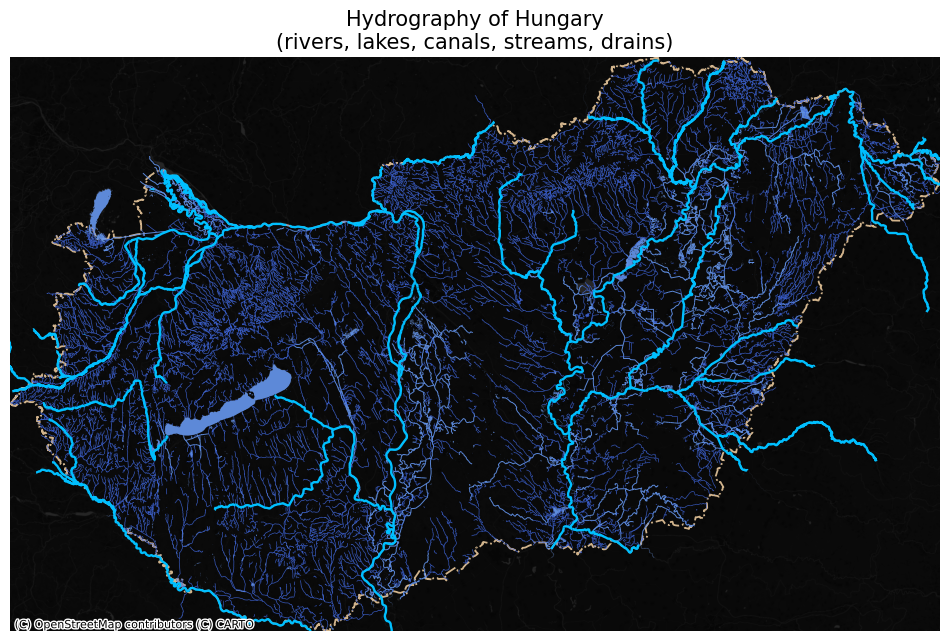

In [24]:
# Create the map
fig, ax = plt.subplots(figsize=(12, 10))

# Plot Hungary's boundary
hungary.plot(ax=ax, color='none', edgecolor='tan', linestyle='-.', linewidth=1.3)

# Plot hydrography features
for subcategory, feature_data in water_features.items():
    feature_data.plot(ax=ax, **feature_styles[subcategory])

# Add a basemap
ctx.add_basemap(ax, crs=hungary.crs, source=ctx.providers.CartoDB.DarkMatterNoLabels, zoom=10)

# Set axis limits
ax.set_xlim(*hungary.total_bounds[[0, 2]])
ax.set_ylim(*hungary.total_bounds[[1, 3]])

# Set title
plt.title("Hydrography of Hungary\n(rivers, lakes, canals, streams, drains)", fontsize=15)
ax.axis("off")

# Save and display the plot
plt.savefig('Hydrography of Hungary.png', dpi=400, bbox_inches='tight')
plt.show()